# Simulation of distribution of $\chi^2$ values  for measurement of some constant

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10,6]
plt.rcParams['font.size']=16

from scipy.stats import chi2, norm
from numpy.random import poisson, randn

## What does the $\chi^2$ distribution describe?

The $\chi^2$ distribution describes the **distribution of the sum of the squares of numbers drawn from a standard normal distribution** (i.e. a normal distribution with mean 0 and standard deviation 1).

The number of independent points summed is called the number of *degrees of freedom (DoF)* and there is a different curve for each number of DoF.

### $\chi^2$ PDF for different DoFs:

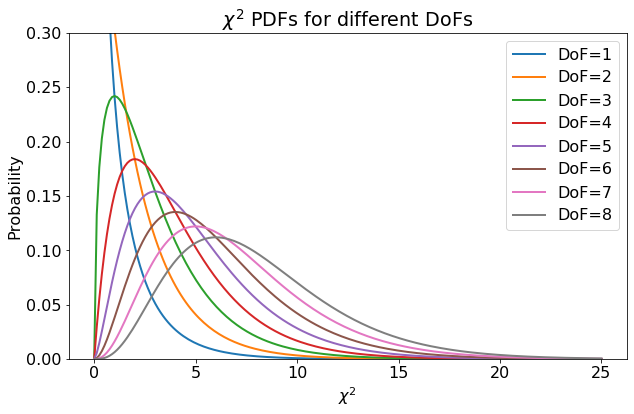

In [39]:
x=np.linspace(0,25,200)
for i in range(8):
    plt.plot(x, chi2.pdf(x,i+1), linewidth=2, label=f"DoF={i+1:}");
plt.ylim([0,0.3])
plt.legend();
plt.title(r'$\chi^2$ PDFs for different DoFs');
plt.xlabel(r'$\chi^2$')
plt.ylabel('Probability');

### Aside: $\chi^2(1)$ and relation to $\sigma$

Thus, $\chi^2(1)$ (i.e. DoF=1) is just the distribution of the standard normal deviates squared. 

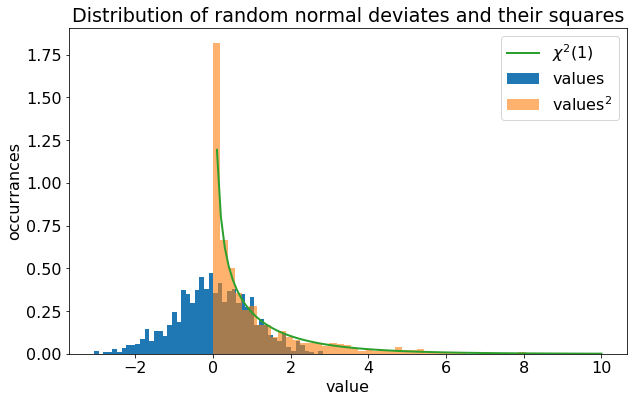

In [59]:
d=randn(1000) 
plt.hist(d,50, density=True, label="values")   
plt.hist(d**2,50, density=True,alpha=0.6,label=r"values$^2$")   
x=np.linspace(0,10,100) 
plt.plot(x,chi2.pdf(x,1), linewidth=2,label=r"$\chi^2 (1) $")
plt.legend()
plt.title('Distribution of random normal deviates and their squares');
plt.xlabel('value');
plt.ylabel('occurrances');

For example, probability of obtaining a value of $\chi^2(1)<4$ is the same as the probability of obtaining a value from the normal distribution between -2 and +2: (i.e. the area under the $\chi^2(1)$  from 0 to +4 is the same as the area under the normal curve from -2 to +2). This is important for, for example, the Likelihood ratio test since obtaining a $\chi^2(1)$ value of $x$ is equivalent to $\sqrt{x}$ standard deviations ($\pm$) from 0.

In [61]:
print(f"P(χ2(1))<4       : {chi2.cdf(4,1):.4f}")
print(f"P(std normal)<|2|: {norm.cdf(2)-norm.cdf(-2):.4f}")

P(χ2(1))<4       : 0.9545
P(std normal)<|2|: 0.9545


## $\chi^2$ Example with simulated data set:

Generate some repeated measurements of a constant of known value and ask are the measurement consistent with the value. Repeat where the value is unknown and the value derived from the data.

### Define the $\chi^2$ function:
$$\chi^2=\sum^N_{i=1} \left(\frac{y_i-e_i}{\sigma_i}\right)^2$$

where the
* $y_i$ are the measured values with uncertainties $\sigma_i$
* $e_i$ are the expected values we are comparing to.

In [62]:
def csq(y,σ,e):
    return np.sum(((y-e)/σ)**2)

### Simulate some values:

Repeated measurements of some value that should be constant in time.

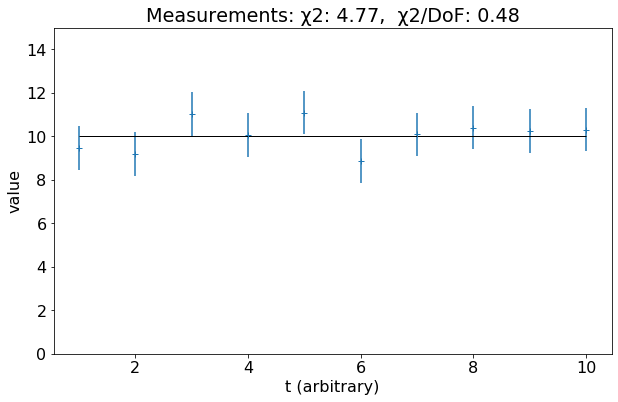

In [63]:
μ=10
σ=1
N=10
t=np.linspace(1,10,N)   # N measurements, say equally spaced
y=randn(N)*σ + μ        # generate N y values from a normal distribution 

plt.errorbar(t,y,yerr=σ,linestyle="",marker='+')
plt.hlines(μ, min(t), max(t), linewidth=1)  # plot the known value
plt.ylim(0,15)
plt.xlabel('t (arbitrary)')
plt.ylabel('value')

c=csq(y,σ,μ)
#print(f"χ2: {c:.2f}, χ2/DoF: {c/N:.2f}")
plt.title(f"Measurements: χ2: {c:.2f},  χ2/DoF: {c/N:.2f}");

### Run the simulation 10,000 times for known $\mu$

In [64]:
μ=10
σ=1
N=10

csl=[]

Ntimes=10000
for i in range(Ntimes):
    y=randn(N)*σ + μ     # generate a data set
    c=csq(y,σ,μ)         # calculate χ2 value for agreement with known μ
    csl.append(c)        # append χ2 value to a list

#### Plot the resulting distribution

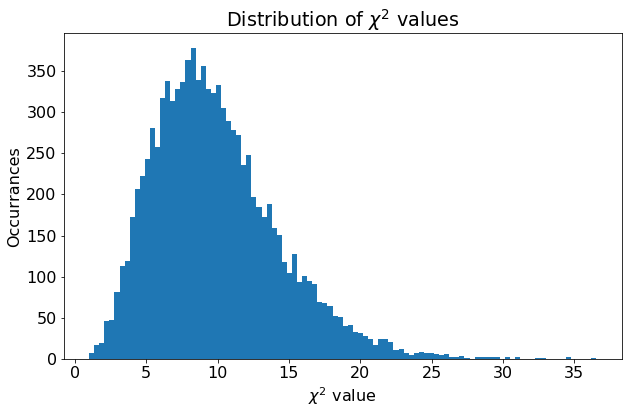

In [65]:
plt.hist(csl,100);

plt.title(r'Distribution of $\chi^2$ values');
plt.xlabel(r'$\chi^2$ value')
plt.ylabel('Occurrances');

### Compare to the expected distribution of $\chi^2$ for given DoF:

Use `scipy.stats.chi2.pdf(χ2, DoF)` which gives the probability distribution function...

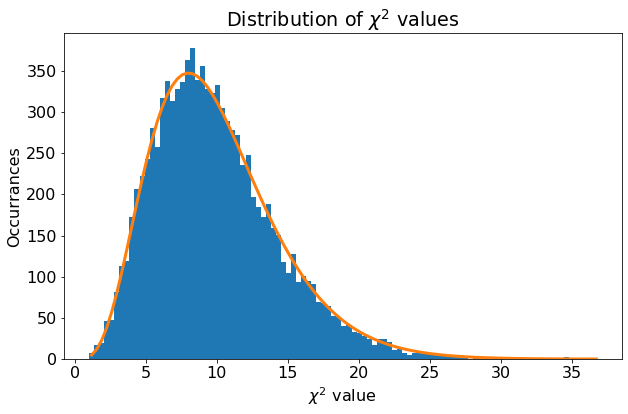

In [66]:
n, bins, _ = plt.hist(csl,100);

binw=bins[1]-bins[0]  # bin widths
bincs=bins+binw/2     # bin centres

plt.title(r'Distribution of $\chi^2$ values');
plt.xlabel(r'$\chi^2$ value')
plt.ylabel('Occurrances');

DoF=N
plt.plot(bincs, Ntimes*binw*chi2.pdf(bincs,DoF), linewidth=3);

## The $\chi^2$ probability (P-value):

Small values of $\chi^2$ are rare and indicate the error bars are too big.

Large values for $\chi^2$ are also rare and indicate either:
* the error bars are too small
* the model does not fit the data

Assuming that the error bars are correct, we can determine the probability of getting a large $\chi^2$ value by chance (called the P-value). 

To determine the P-value we work out the probability for the $\chi^2$ distribution for the given degrees of freedom ($\nu$) of getting the observed value $\chi_{obs}^2$ or greater, i.e.

$$P=\int_{\chi_{obs}^2}^\infty P_{\chi^2}(\nu)\  d\!\chi^2$$

![](p-value.png)

This is also known as the survival function (and is equivalent to 1 - the cumulative distribution function)

Use `scipy.stats.chi2.sf(χ2, DoF)`

### Re-run earlier simulation with P-value printed too

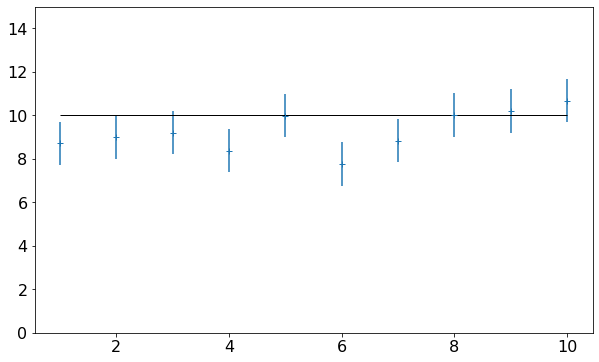

In [67]:
μ=10
σ=1
N=10
x=np.linspace(1,10,N)
y=randn(N)*σ + μ

plt.errorbar(x,y,yerr=σ,linestyle="",marker='+')
plt.hlines(μ, min(x), max(x), linewidth=1)  # plot the known value
plt.ylim(0,15)

c=csq(y,σ,μ)
P=chi2.sf(c,N)

# Degrees of Freedom

The number of degrees of freedom is defined to be: $\nu=n-n_c$ where $n$ is the number of data points and $n_c$ is the number of constraints derived from the data.

In the above test we were performing the $\chi^2$ test to see if our measurements agreed with a known value ($\mu$ was defined to be 10).

Now, let's do the same simulation but $\mu$ is unknown and we derive it from the data itseld:

In [68]:
μ=10     # for generating the data
σ=1
N=10

csl=[]

Ntimes=10000
for i in range(Ntimes):
    y=randn(N)*σ + μ      # generate data set
    μm=np.mean(y)         # measured mean (μm) derived from the data
    c=csq(y,σ,μm)         # Chisq test for agreement between data and model 
                          # (model = some value, derived from the data) 
    csl.append(c)         # 

## Plot with $DoF=n$

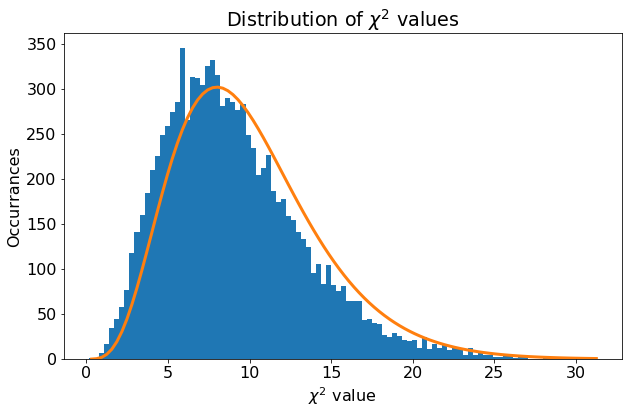

In [69]:
n, bins, _ = plt.hist(csl,100);

binw=bins[1]-bins[0]  # bin widths
bincs=bins+binw/2     # bin centres

plt.title(r'Distribution of $\chi^2$ values');
plt.xlabel(r'$\chi^2$ value')
plt.ylabel('Occurrances');

ν=N
plt.plot(bincs, Ntimes*binw*chi2.pdf(bincs,ν), linewidth=3);

## Plot with $DoF=n-n_c$

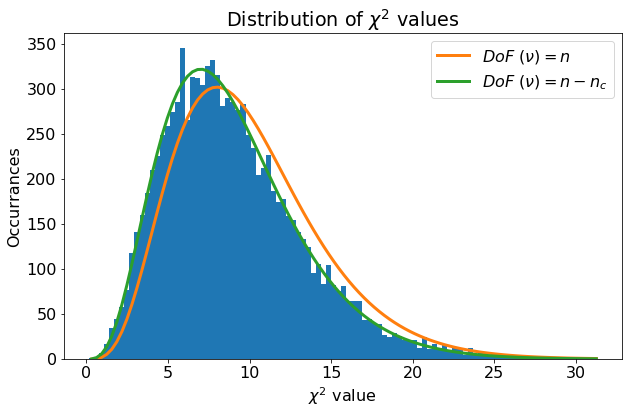

In [70]:
n, bins, _ = plt.hist(csl,100);

binw=bins[1]-bins[0]  # bin widths
bincs=bins+binw/2     # bin centres

plt.title(r'Distribution of $\chi^2$ values');
plt.xlabel(r'$\chi^2$ value')
plt.ylabel('Occurrances');

ν=N-1 # nc = 1 since we derived the mean from the data

plt.plot(bincs, 
         Ntimes*binw*chi2.pdf(bincs,DoF), 
         linewidth=3, 
         label=r'$DoF\ (\nu) =n$');

DoF=N-1
plt.plot(bincs, 
         Ntimes*binw*chi2.pdf(bincs,DoF),
         linewidth=3, 
         label=r'$DoF\ (\nu)=n-n_c$');
plt.legend();

## Conclusion on DoF:

For producing the reduced $\chi^2$ value and the P-value you must take account of the nuber of constraints derived from the data.

For example, if you are fitting a straight line to the data of the form $y=mx+c$ then $m$ and $c$ are being derived from the data and $n_c=2$


# Averaging

mean: 10.01, σ: 1.00


(5, 15)

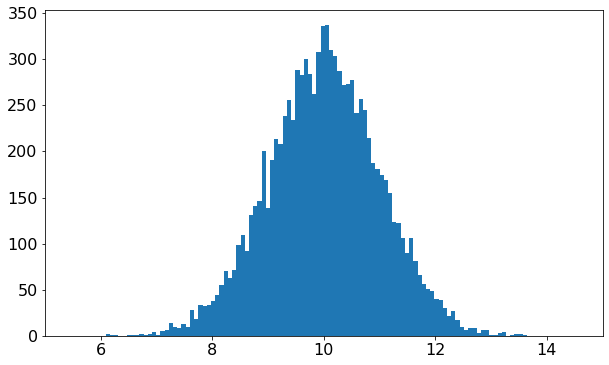

In [71]:
μ=10
σ=1
N=10000
y=randn(N)*σ + μ  

plt.hist(y,100);
print(f"mean: {np.mean(y):.2f}, σ: {np.std(y):.2f}")
plt.xlim([5,15])

### Now average every 10 points...

In [72]:
means=[]
for i in range(100):
    means.append(np.mean(y[10*i:10*i+10]))  

mean: 10.04, σ: 0.33


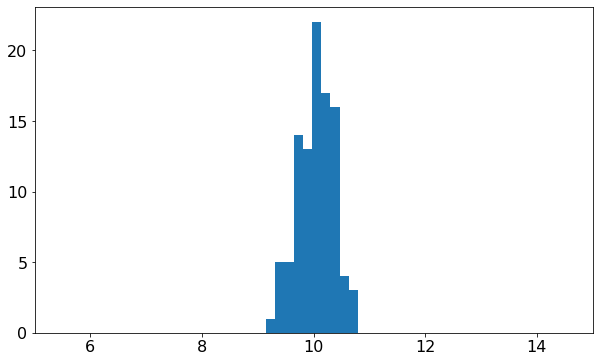

In [73]:
plt.hist(means,10);
print(f"mean: {np.mean(means):.2f}, σ: {np.std(means):.2f}")
plt.xlim([5,15]);

Therefore, **the error bars on the averages are much smaller than on the individual points.**

For calculating the $\chi^2$ value (and corresponding P-value) the correct error must be used?

How? Error on the mean:

## Mean and Error on the Mean:

If $\sigma_i=\sigma$=constant:

Mean:
$$\mu = \frac{\sum x_i}{N}$$

Error on Mean:
$$\sigma_\mu=\frac{\sigma}{\sqrt N}$$

which are reduced versions of the equations when $\sigma_i$ are not the same:

Weighted Mean:
$$\mu=\frac{\sum (x_i/\sigma_i^2)}{\sum (1/\sigma_i^2)}$$

Error on Weighted Mean:
$$\sigma_\mu = \frac{1}{\sqrt{\sum(1/\sigma_i^2)}}$$